## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing 20_news_group dataset from sklearn library

In [57]:
from sklearn.datasets import fetch_20newsgroups

In [5]:
df = fetch_20newsgroups()

In [7]:
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [9]:
category = df.target_names

### These are the following news categories

In [10]:
category

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
train = fetch_20newsgroups(subset = 'train', categories = category)
test = fetch_20newsgroups(subset = 'test', categories = category)

### Sample of one random article 

In [19]:
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [17]:
len(train.data)

11314

In [18]:
len(test.data)

7532

## Using MUltinomial Naive Bayes Classifier Model

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [28]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

### Building a heatmap

Text(87,0.5,'Predicted Label')

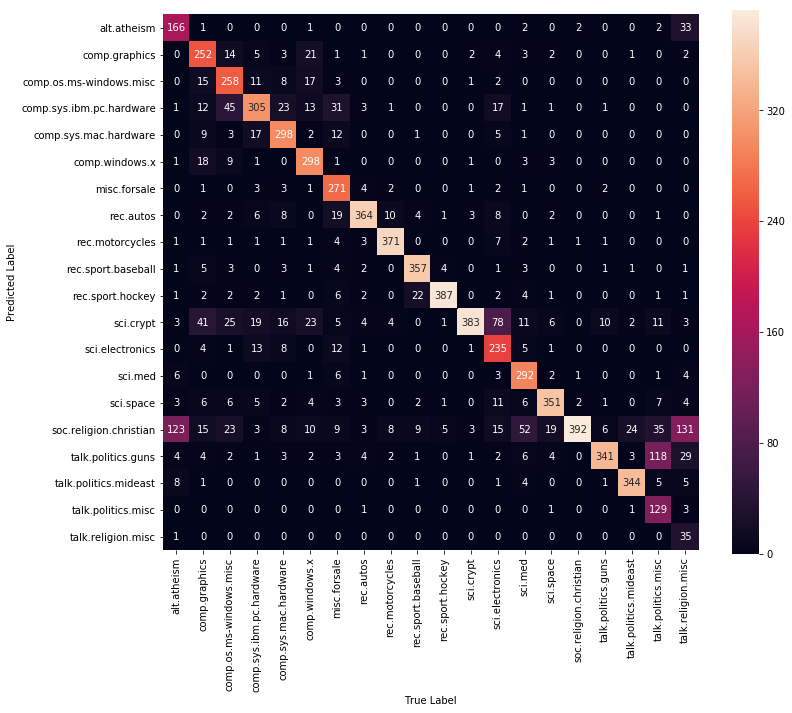

In [46]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
plt.figure(figsize = (12,10))
sns.heatmap(mat.T, square = True, annot = True,  fmt = 'd', xticklabels = train.target_names, yticklabels = train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [51]:
def predict_category(s,model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

### Using predict_category function for calssification

In [ ]:
predict_category(<ENTER YOUR ARTICLE HERE>)

### Few classification examples

In [52]:
predict_category('India is very good in cricket sport')

'rec.sport.hockey'

In [50]:
predi = model.predict(['India is very good in cricket sport'])
print(train.target_names[predi[0]])

rec.sport.hockey


In [53]:
predict_category('India Prime Minister is Modi')

'talk.politics.mideast'

In [55]:
predict_category('India has too many vehicles ')

'rec.autos'